# Visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame, GeoSeries
from shapely.geometry import Point, Polygon
#import adjustText as aT

In [2]:
# Loading the data files
path = '/Users/Dustin/Desktop/Food Deserts/'
county_shape = path + 'CAMS/CAMS_ZIPCODE_STREET_SPECIFIC.shp'
income = pd.read_csv(path + 'csv_files/income_clean.csv')
business = pd.read_csv(path + 'csv_files/clean.csv')
data = gpd.read_file(county_shape)

# merge income and county
zip_income = data.merge(income, left_on='Zip_Num', right_on='Zip Code', how = 'outer')

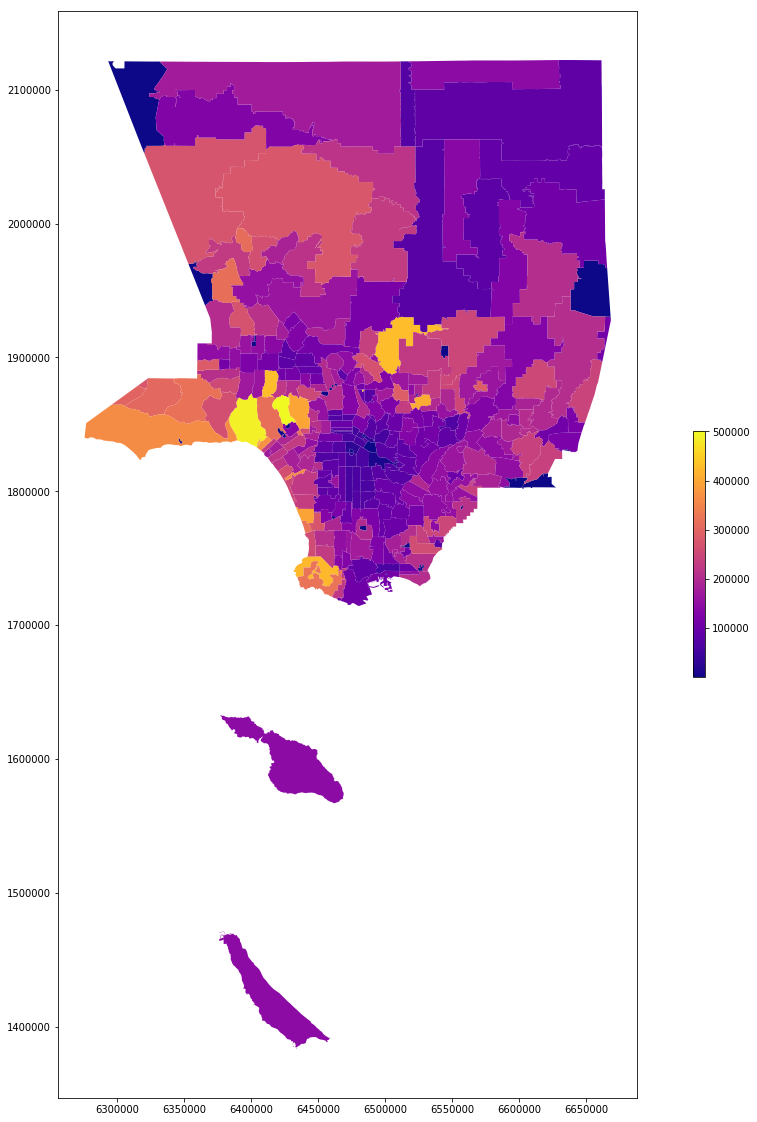

In [154]:
fig, ax = plt.subplots(figsize = (20,20))

#Color bar is created below
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=75, vmax=500000))
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=.011)


ax_zip = zip_income.plot(column='Estimated Median Income', ax=ax, cmap='plasma', vmin=12864, vmax =184722)

# Plot with ESPG:2229 Mapping

In [4]:
# Change the mapping
import pyproj

project_projection = pyproj.Proj("+init=EPSG:2229") # Output map projections, GIS
google_projection = pyproj.Proj("+init=EPSG:4326") # Input map projections, google

# Save Coordinates to a list
longitude = business['LONGITUDE'].values
latitude = business['LATITUDE'].values

# Output epsg:2229 map projections where x=lat and y=long
y, x = pyproj.transform(google_projection, project_projection, longitude, latitude)

In [5]:
# Loop lat an lon to get EPSG:2229 coordinates
coord = []
for lat,lon in zip(x,y):
    coord.append(Point(lon, lat))
business['EPSG:2229'] = coord

In [22]:
# Put into a geodataframe
geo2229 = gpd.GeoDataFrame(business['EPSG:2229'], geometry=business['EPSG:2229'])

C:\Users\Dustin\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


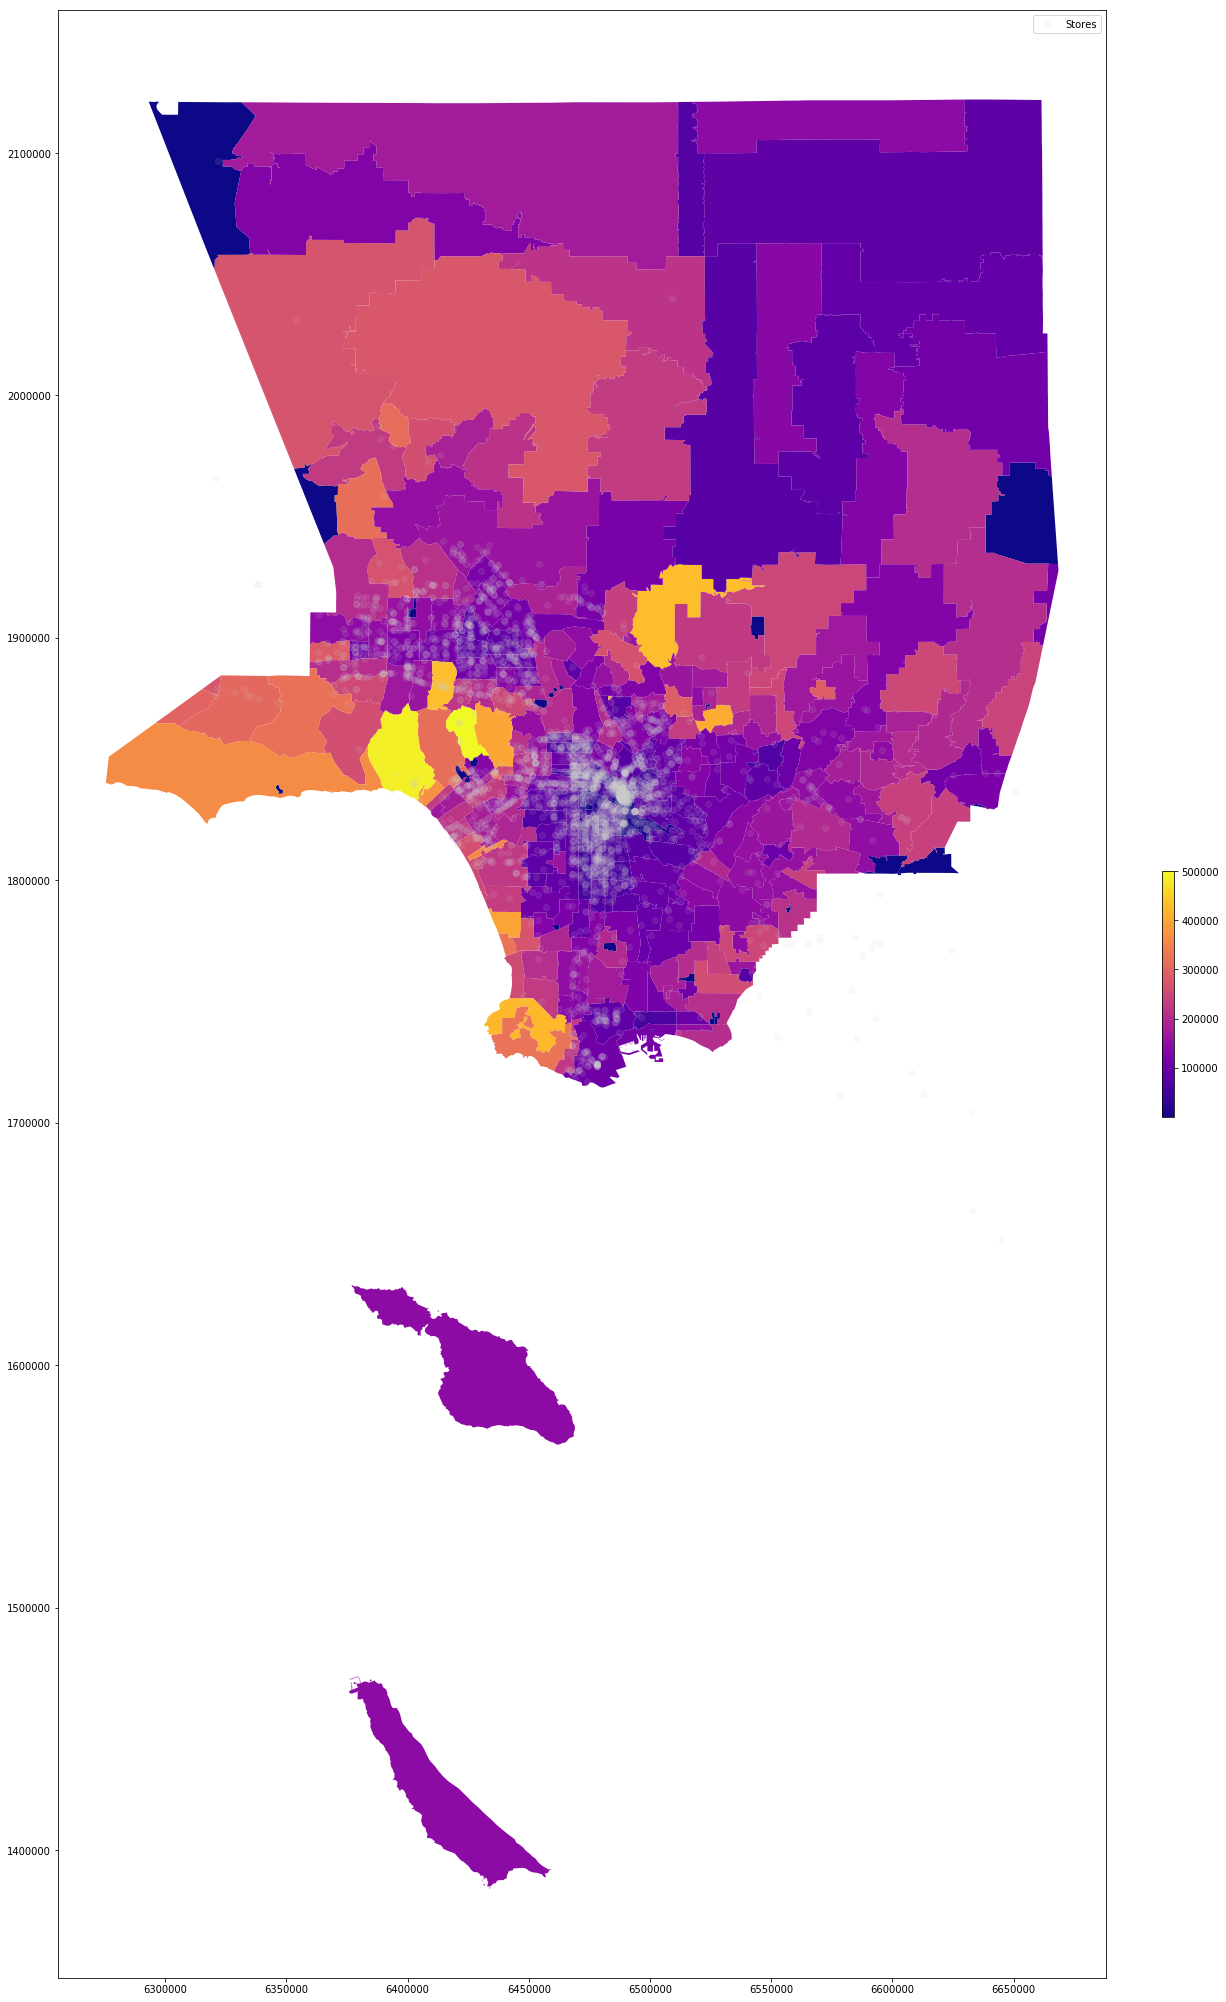

In [8]:
# Graph from above
fig, ax = plt.subplots(figsize = (20,100))

#Color bar is created below
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=75, vmax=500000))
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=.011)


ax_zip = zip_income.plot(column='Estimated Median Income', ax=ax, cmap='plasma', vmin=12864, vmax =184722)
ax = geo2229.plot(color='lightgrey', alpha=0.1, ax=ax_zip, label='Stores')
ax.legend()

# Plot with google mapping

In [14]:
# Loading the data files
polygons = gpd.read_file(county_shape)

# Convert geometry to google coordinates
polygons = polygons.to_crs(epsg=4326)

In [15]:
# Loop to get Points() object - to be used for geodataframe
coord = []
for lat, lon in zip(business['LATITUDE'], business['LONGITUDE']):
    coord.append(Point(lon, lat))
business['POINTS'] = coord

In [20]:
# Make a geodataframe
geo = gpd.GeoDataFrame(business['POINTS'], geometry=business['POINTS'])

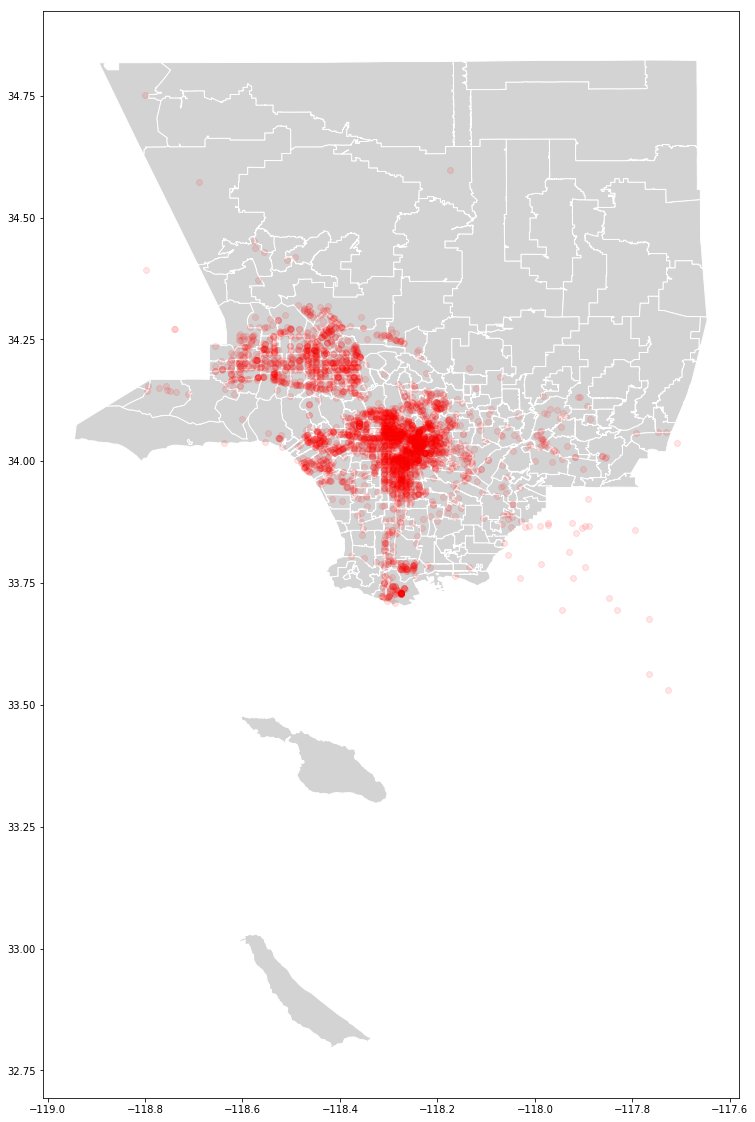

In [21]:
# Plot the two geodataframes together
ax = polygons.plot(figsize=(20,20), color='lightgrey', edgecolor='white')
geo.plot(color='red', alpha=0.1, ax=ax, label='Stores')

# Notes

In [ ]:
# # For google maps, we should change lat <-> lon
# def swap_xy(geom):
 
#     def swap_xy_coords(coords):
#         for x, y in coords:
#             yield (y, x)

#     ring = geom.exterior
#     shell = type(ring)(list(swap_xy_coords(ring.coords)))
#     holes = list(geom.interiors)
#     for pos, ring in enumerate(holes):
#         holes[pos] = type(ring)(list(swap_xy_coords(ring.coords)))
#     return type(geom)(shell, holes)

# google_maps_locations = polygons.geometry.apply(swap_xy)

In [ ]:
# Transform polygon by rotating and reflecting
# poly_geo = GeoSeries(poly)
# poly_trans = poly_geo.rotate(90).scale(-1)